In [5]:
%load_ext autoreload
%autoreload 2

import sys, os
import numpy as np
import matplotlib.pyplot as plt
sys.path.insert(0, os.path.abspath(os.path.join(os.path.abspath(''), '..')))


import pandas as pd
from hydra.model.force_encoder_ecto import ForceEncoderEcto
from hydra.model.force_encoder_endo import ForceEncoderEndo
import hydra.model.helper as helper

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
NUMX = 30
NUMY = 60

In [32]:
# Load calcium
FILENAME = "2020-09-04-20-58-46-156006"

calcium = pd.read_hdf("./results/data/calcium/" + FILENAME + ".h5")
calcium = calcium.values.reshape(len(calcium), NUMX*2, NUMY)

In [33]:
# Separate ecto and endo
ca_ecto = calcium[:, :NUMX, :]
ca_endo = calcium[:, NUMX:, :]

In [50]:
# Encode force
FILENAME = "156006_k3_16_k4_4_chalf_085"

fo_ecto = helper.encode_force_2d(ForceEncoderEcto, ca_ecto, NUMX, NUMY, 0.02, save_interval=5)
fo_endo = helper.encode_force_2d(ForceEncoderEndo, ca_endo, NUMX, NUMY, 0.02, save_interval=5)

100%|██████████████████████████████████████████████████████████████████████████| 25000/25000 [00:05<00:00, 4560.10it/s]


In [51]:
# Average force and save
fo_ecto_avg = helper.average_force(fo_ecto, NUMX, NUMY, 10, 20)
df = pd.DataFrame(fo_ecto_avg.reshape(-1, 200))
df.to_csv("./results/data/force/" + FILENAME + "_ecto.csv", index = False)

fo_endo_avg = helper.average_force(fo_endo, NUMX, NUMY, 10, 20)
df = pd.DataFrame(fo_endo_avg.reshape(-1, 200))
df.to_csv("./results/data/force/" + FILENAME + "_endo.csv", index = False)

In [52]:
# Load to double check / compare
fo__ = pd.read_csv("./results/data/force/" + FILENAME + "_ecto" + ".csv")
fo__ = fo__.values.reshape(-1, 10, 20)

FILENAME = "156006_k7_075_0005"
fo = pd.read_csv("./results/data/force/" + FILENAME + "_ecto" + ".csv")
fo = fo.values.reshape(-1, 10, 20)
# plt.imshow(fo_ecto[int((208+35)/0.1)], vmin=0, vmax=0.5)

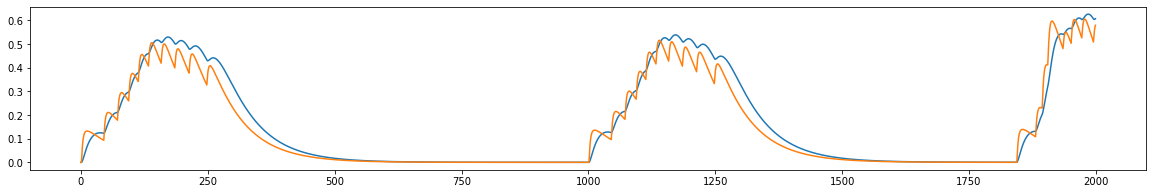

In [53]:
plt.figure(figsize=(20,3))
plt.plot(fo[:2000, 5, 10])
# plt.plot(fo_[:2000, 5, 10])
plt.plot(fo__[:2000, 5, 10])
plt.show()

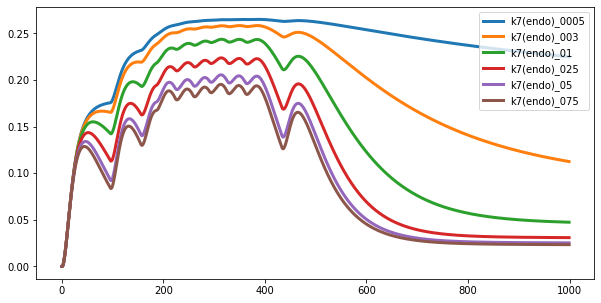

In [75]:
plt.figure(figsize=(10,5))
names = ["k7(endo)_0005", "k7(endo)_003", "k7(endo)_01", "k7(endo)_025", "k7(endo)_05", "k7(endo)_075"]
for name in names:
    fo = pd.read_csv("./results/data/force/" + name + "_endo" + ".csv")
    fo = fo.values.reshape(-1, 10, 20)
    plt.plot(fo[:, 5, 10], label=name, linewidth=3)
plt.legend(loc="upper right")
plt.show()

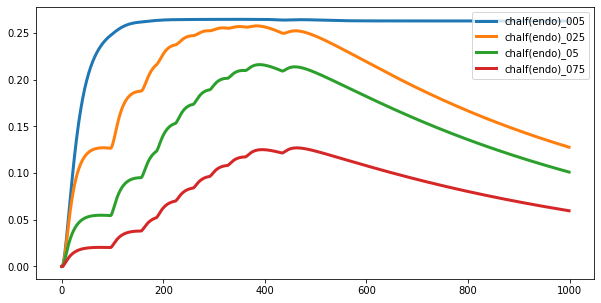

In [77]:
plt.figure(figsize=(10,5))
names = ["chalf(endo)_005", "chalf(endo)_025", "chalf(endo)_05", "chalf(endo)_075"]
for name in names:
    fo = pd.read_csv("./results/data/force/" + name + "_endo" + ".csv")
    fo = fo.values.reshape(-1, 10, 20)
    plt.plot(fo[:, 5, 10], label=name, linewidth=3)
plt.legend(loc="upper right")
plt.show()